In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA

In [2]:
# Specifying the print format for floats
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

In [3]:
# Reading the dataset
bo = pd.read_csv('/Users/ramyavissapragada/Desktop/buan6383/boxOffice.csv')
bo

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71


### Question 1. Plot histograms of the continuous variables (box, budget, starpwr) to see if any transformations are needed. Are any of them skewed? Apply a log-transformation to all the skewed variables

Text(0, 0.5, 'Frequency')

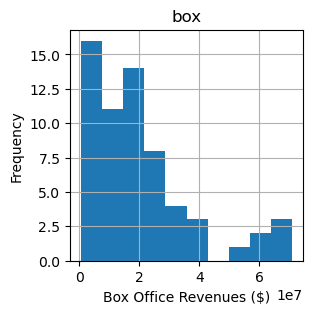

In [4]:
# Plotting the histogram for box variable
bo.hist(column=['box'], bins = 10, figsize = (3,3))
plt.xlabel('Box Office Revenues ($)')
plt.ylabel('Frequency')

In [5]:
# Verifying that box is skewed by looking at the median and mean values
b_median = bo['box'].median()
b_median

16930926.0

In [6]:
# Computing mean for box variable.
b_mean = bo['box'].mean()
b_mean

20720651.370967742

Text(0, 0.5, 'Frequency')

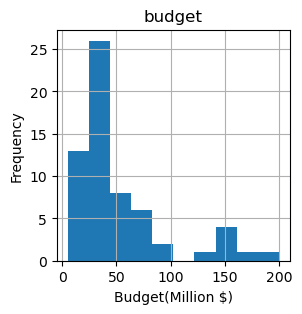

In [7]:
# Plotting the histogram for budget variable
bo.hist(column=['budget'], bins = 10, figsize = (3,3))
plt.xlabel('Budget(Million $)')
plt.ylabel('Frequency')

In [8]:
# Verifying that budget is skewed by looking at the median and mean values
bud_median = bo['budget'].median()
bud_median

37.4

In [9]:
# Computing mean for budget variable.
bud_mean = bo['budget'].mean()
bud_mean

53.287096774193536

array([[<Axes: title={'center': 'starpowr'}>]], dtype=object)

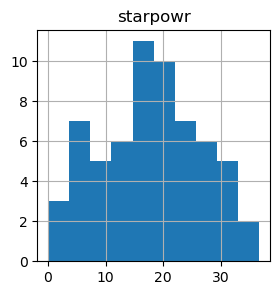

In [10]:
# Plotting the histogram for starpowr variable
bo.hist(column=['starpowr'], bins = 10, figsize = (3,3))

In [11]:
# Verifying that starpowr is symmetric by looking at the mean and median values
s_median = bo['starpowr'].median()
s_median

18.065

In [12]:
# Mean of starpowr variable
s_mean = bo['starpowr'].mean()
s_mean

18.031612903225803

In [13]:
# As the box and budget distributions are skewed, we apply log transformations as follows
columns = ['box', 'budget']
for col in columns:
        bo['log_' + col] = np.log(bo[col])

In [14]:
# Dropping the columns as we transformed and added the transformed-columns
bo = bo.drop(['box', 'budget'], axis = 1)
bo

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3,log_box,log_budget
0,0,0,0,19.83,0,0,1,0,0,7860.500000,10,144,0.49,16.768705,3.332205
1,0,1,0,32.69,1,0,0,1,0,5737.000000,59,468,0.79,17.960336,5.010635
2,0,0,0,15.69,0,0,1,0,0,850.000000,24,198,0.36,15.502207,3.621671
3,0,0,1,23.62,1,1,0,0,0,15326.000000,93,1778,0.76,18.028066,5.298317
4,0,1,0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53,17.082152,5.010635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,9085.500000,68,647,0.70,17.898476,5.164786
58,0,0,1,4.25,0,1,0,0,0,3186.000000,94,39,0.62,15.488719,3.091042
59,0,0,1,5.96,0,0,0,0,1,17584.000000,58,122,0.53,16.951212,2.815409
60,0,0,1,16.62,1,1,0,0,0,10609.666670,594,849,0.71,18.077493,4.442651


Text(0, 0.5, 'Frequency')

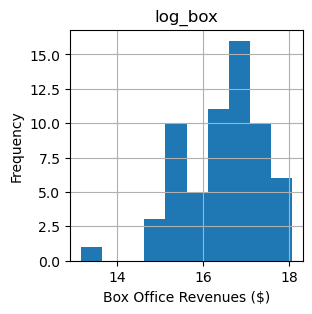

In [15]:
# Plotting the log-transformed box variable for verification.
bo.hist(column=['log_box'], bins = 10, figsize = (3,3))
plt.xlabel('Box Office Revenues ($)')
plt.ylabel('Frequency')

In [16]:
# Verifying that log_box is symmetric by looking at the median value
box_median = bo['log_box'].median()
box_median

16.644640923309467

In [17]:
# Mean of log_box variable
box_mean = bo['log_box'].mean()
box_mean

16.479931354592047

Text(0, 0.5, 'Frequency')

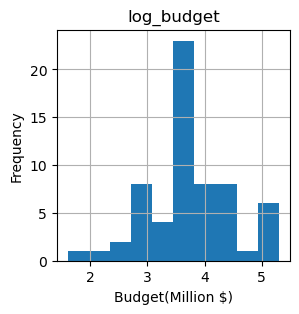

In [18]:
# Plotting the log-transformed budget variable for verification.
bo.hist(column=['log_budget'], bins = 10, figsize = (3,3))
plt.xlabel('Budget(Million $)')
plt.ylabel('Frequency')

In [19]:
# Verifying that log_budget is symmetric by looking at the median value
budget_median = bo['log_budget'].median()
budget_median

3.6216707044204863

In [20]:
# Mean of log_budget variable
budget_mean = bo['log_budget'].mean()
budget_mean

3.7146839302622365

### Question 2. Run a linear regression of box office revenues on the “traditional” variables (i.e., using all the independent variables (except the “buzz” variables). If any variables were transformed, be sure to use the transformed versionsof those variables. What are the R2 and adjusted- R2 values? Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (p > |t|)?

In [21]:
# Separating the dependent and independent variables
y = bo['log_box']
x = bo.copy()
x = x.drop(['addict', 'cmngsoon', 'fandango', 'cntwait3', 'log_box'], axis = 1)
x

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget
0,0,0,0,19.83,0,0,1,0,0,3.332205
1,0,1,0,32.69,1,0,0,1,0,5.010635
2,0,0,0,15.69,0,0,1,0,0,3.621671
3,0,0,1,23.62,1,1,0,0,0,5.298317
4,0,1,0,19.02,0,0,0,1,0,5.010635
...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,5.164786
58,0,0,1,4.25,0,1,0,0,0,3.091042
59,0,0,1,5.96,0,0,0,0,1,2.815409
60,0,0,1,16.62,1,1,0,0,0,4.442651


In [22]:
# Adding new constant column for the intercept
x1 = x.copy()
x1 = sm.add_constant(x1)

In [23]:
# Applying Linear Regression and viewing the summary
linregr = sm.OLS(y, x1).fit()
print(linregr.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sun, 10 Sep 2023   Prob (F-statistic):             0.0109
Time:                        00:53:12   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5768      0.688     19.727      0.0

### Question 3. Run another linear regression using only the variables that were significant (again, ignoring the “buzz” variables). What are the R2 and adjusted- R2 values? Are all the variables still significant at the 0.10 level?

In [24]:
# Separating the significant variables based on above summary and taking them as independent variables (x_sig)
x_sig = x1.copy()
x_sig = x_sig.drop(['G', 'PG', 'PG13', 'starpowr', 'action', 'comedy', 'animated'], axis = 1)
x_sig

,const,sequel,horror,log_budget
0,1.0,0,0,3.332205
1,1.0,1,0,5.010635
2,1.0,0,0,3.621671
3,1.0,1,0,5.298317
4,1.0,0,0,5.010635
...,...,...,...,...
57,1.0,0,0,5.164786
58,1.0,0,0,3.091042
59,1.0,0,1,2.815409
60,1.0,1,0,4.442651


In [25]:
# Applying Linear Regression and viewing the summary
linregr_sig = sm.OLS(y, x_sig).fit()
print(linregr_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           0.000162
Time:                        00:53:12   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8718      0.611     22.700      0.0

### Question 4. Plot histograms of the four “buzz” variables. Are any of them skewed? Apply a log-transformation to all the skewed variables.

Text(0, 0.5, 'Frequency')

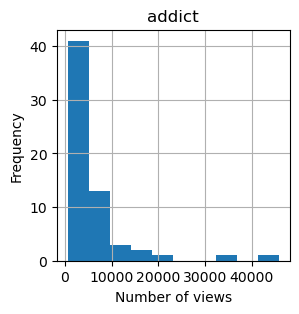

In [26]:
# Plotting the histogram for addict variable
bo.hist(column=['addict'], bins = 10, figsize = (3,3))
plt.xlabel('Number of views')
plt.ylabel('Frequency')

In [27]:
# Verifying that addict is skewed by looking at the median and mean values
add_median = bo['addict'].median()
add_median

3480.0

In [28]:
# Mean of addict variable
add_mean = bo['addict'].mean()
add_mean

5933.807212080645

Text(0, 0.5, 'Frequency')

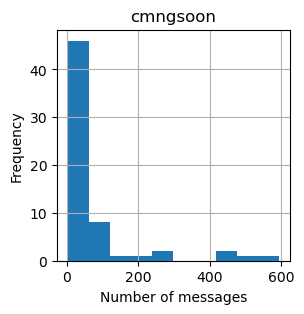

In [29]:
# Plotting the histogram for cmngsoon variable
bo.hist(column=['cmngsoon'], bins = 10, figsize = (3,3))
plt.xlabel('Number of messages')
plt.ylabel('Frequency')

In [30]:
# Verifying that cmngsoon is skewed by looking at the median and mean values
cms_median = bo['cmngsoon'].median()
cms_median

36.5

In [31]:
# Mean of cmngsoon variable
cms_mean = bo['cmngsoon'].mean()
cms_mean

78.20967741935483

Text(0, 0.5, 'Frequency')

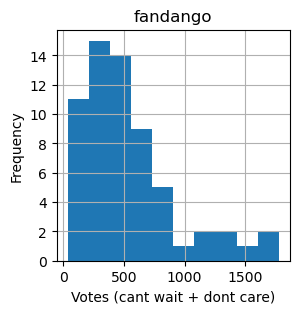

In [32]:
# Plotting the histogram for fandango variable
bo.hist(column=['fandango'], bins = 10, figsize = (3,3))
plt.xlabel('Votes (cant wait + dont care)')
plt.ylabel('Frequency')

In [33]:
# Verifying that fandango is skewed by looking at the median and mean values
fan_median = bo['fandango'].median()
fan_median

430.5

In [34]:
# Mean of fandango variable
fan_mean = bo['fandango'].mean()
fan_mean

522.3387096774194

Text(0, 0.5, 'Frequency')

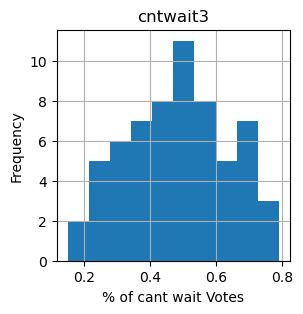

In [35]:
# Plotting the histogram for cntwait3 variable
bo.hist(column=['cntwait3'], bins = 10, figsize = (3,3))
plt.xlabel('% of cant wait Votes')
plt.ylabel('Frequency')

In [36]:
# Verifying that cntwait3 is symmetric by looking at the median and mean values
cntwait_median = bo['cntwait3'].median()
cntwait_median

0.485

In [37]:
# Mean of cntwait3 variable
cntwait_mean = bo['cntwait3'].mean()
cntwait_mean

0.48241935483870974

In [38]:
# As the addict, cmngsoon and fandango distributions are skewed, we apply log transformations as follows
columns = ['addict', 'cmngsoon', 'fandango']
for col in columns:
        bo['log_' + col] = np.log(bo[col])

Text(0, 0.5, 'Frequency')

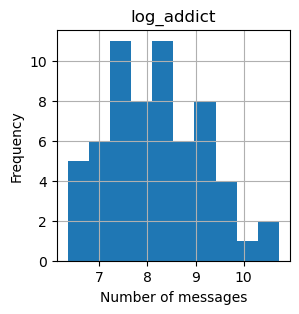

In [39]:
# Plotting the log-transformed addict variable for verification.
bo.hist(column=['log_addict'], bins = 10, figsize = (3,3))
plt.xlabel('Number of messages')
plt.ylabel('Frequency')

In [40]:
# Verifying that log_addict is symmetric by looking at the median value
addict_median = bo['log_addict'].median()
addict_median

8.154398954019864

In [41]:
# Mean of log_addict variable
addict_mean = bo['log_addict'].mean()
addict_mean

8.169473112629309

Text(0, 0.5, 'Frequency')

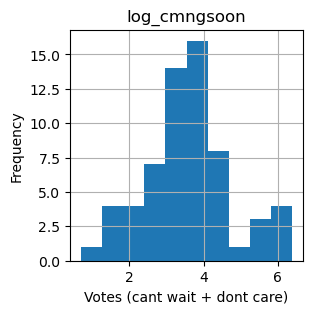

In [42]:
# Plotting the log-transformed cmngsoon variable for verification.
bo.hist(column=['log_cmngsoon'], bins = 10, figsize = (3,3))
plt.xlabel('Votes (cant wait + dont care)')
plt.ylabel('Frequency')

In [43]:
# Verifying that log_cmngsoon is symmetric by looking at the median value
cmngsoon_median = bo['log_cmngsoon'].median()
cmngsoon_median

3.5964671106078994

In [44]:
# Mean of log_cmngsoon variable
cmngsoon_mean = bo['log_cmngsoon'].mean()
cmngsoon_mean

3.6064845908340533

Text(0, 0.5, 'Frequency')

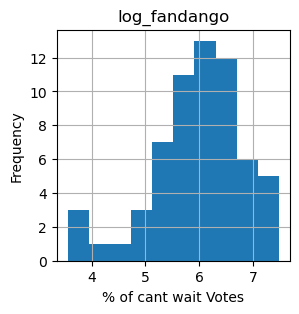

In [45]:
# Plotting the log-transformed fandango variable for verification.
bo.hist(column=['log_fandango'], bins = 10, figsize = (3,3))
plt.xlabel('% of cant wait Votes')
plt.ylabel('Frequency')

In [46]:
# Verifying that log_fandango is symmetric by looking at the median value
fandango_median = bo['log_fandango'].median()
fandango_median

6.064795544711362

In [47]:
# Mean of log_fandango variable
fandango_mean = bo['log_fandango'].mean()
fandango_mean

5.957639049903583

### Question 5. Run a linear regression of box office revenues on all the independent variables, including the “buzz” variables (transformed as needed). What are the R2 and adjusted- R2 values? Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (p > |t|)? 

In [48]:
# Separating the independent variables[including buzz (transformed as needed)] (the dependent variable being log_box)
x2_buzz = bo.copy()
x2_buzz = x2_buzz.drop(['log_box', 'addict', 'cmngsoon', 'fandango'], axis = 1)
x2_buzz

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,cntwait3,log_budget,log_addict,log_cmngsoon,log_fandango
0,0,0,0,19.83,0,0,1,0,0,0.49,3.332205,8.969605,2.302585,4.969813
1,0,1,0,32.69,1,0,0,1,0,0.79,5.010635,8.654692,4.077537,6.148468
2,0,0,0,15.69,0,0,1,0,0,0.36,3.621671,6.745236,3.178054,5.288267
3,0,0,1,23.62,1,1,0,0,0,0.76,5.298317,9.637306,4.532599,7.483244
4,0,1,0,19.02,0,0,0,1,0,0.53,5.010635,8.428198,3.401197,7.011214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,0.70,5.164786,9.114435,4.219508,6.472346
58,0,0,1,4.25,0,1,0,0,0,0.62,3.091042,8.066521,4.543295,3.663562
59,0,0,1,5.96,0,0,0,0,1,0.53,2.815409,9.774745,4.060443,4.804021
60,0,0,1,16.62,1,1,0,0,0,0.71,4.442651,9.269521,6.386879,6.744059


In [49]:
# Adding new constant column for the intercept
x2_buzz = sm.add_constant(x2_buzz)

In [50]:
# Applying Linear Regression and viewing the summary
linregr_buzz = sm.OLS(y, x2_buzz).fit()
print(linregr_buzz.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.77e-06
Time:                        00:53:13   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4958      0.993     11.581   

### Question 6. Run another linear regression using only the variables that were significant. What are the R2 and adjusted- R2 values? Are all the variables still significant at the 0.10 level?

In [51]:
# Separating the significant variables based on above summary and taking them as independent variables (x_sig_buzz)
x_sig_buzz = x2_buzz.copy()
x_sig_buzz = x_sig_buzz.drop(['G', 'PG13', 'starpowr', 'comedy', 'horror', 'log_budget', 'log_cmngsoon', 'log_fandango', 'sequel'], axis = 1)
x_sig_buzz

,const,PG,action,animated,cntwait3,log_addict
0,1.0,0,0,0,0.49,8.969605
1,1.0,1,0,1,0.79,8.654692
2,1.0,0,0,0,0.36,6.745236
3,1.0,0,1,0,0.76,9.637306
4,1.0,1,0,1,0.53,8.428198
...,...,...,...,...,...,...
57,1.0,1,0,1,0.70,9.114435
58,1.0,0,1,0,0.62,8.066521
59,1.0,0,0,0,0.53,9.774745
60,1.0,0,1,0,0.71,9.269521


In [52]:
# Applying Linear Regression and viewing the summary
linregr_buzz_sig = sm.OLS(y, x_sig_buzz).fit()
print(linregr_buzz_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           6.06e-09
Time:                        00:53:13   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5048      0.751     16.644      0.0

### Question 8. Apply Principal Component Analysis to just the 4 “buzz” variables. If you transformed any of them, make sure you use the transformed versions. Also make sure that you standardize the variables first. What are the eigen values associated with each component? How many principal components are selected using (i) Kaiser's Rule, and using “explained variance" thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90%?

In [53]:
# Separating the buzz variables.
x_pca_buzz = x2_buzz.copy()
x_pca_buzz = x_pca_buzz.drop(['G', 'PG13', 'starpowr', 'comedy', 'horror', 'log_budget', 'sequel', 'PG', 'action', 'animated', 'const'], axis = 1)
x_pca_buzz

,cntwait3,log_addict,log_cmngsoon,log_fandango
0,0.49,8.969605,2.302585,4.969813
1,0.79,8.654692,4.077537,6.148468
2,0.36,6.745236,3.178054,5.288267
3,0.76,9.637306,4.532599,7.483244
4,0.53,8.428198,3.401197,7.011214
...,...,...,...,...
57,0.70,9.114435,4.219508,6.472346
58,0.62,8.066521,4.543295,3.663562
59,0.53,9.774745,4.060443,4.804021
60,0.71,9.269521,6.386879,6.744059


In [54]:
# Standardizing the data - scaling it in accordance to sample statistics.
sc = prep.StandardScaler()
sx = pd.DataFrame(sc.fit_transform(x_pca_buzz), columns = x_pca_buzz.columns)
sc.scale_ = np.std(sx, axis = 0, ddof = 1).to_list()
sx = sx/sc.scale_

In [55]:
# Creating a PCA object, fitting the feature set
pca4_buzz = PCA()
pcs4_buzz = pca4_buzz.fit(sx)

In [56]:
# Getting the Eigen Values
print('\nEigen Values of Correlation Matrix')
pcs4_buzz.explained_variance_


Eigen Values of Correlation Matrix


array([ 2.4142,  0.7752,  0.4521,  0.3585])

In [57]:
# Getting Explained Variance Ratio - by each Principal Component
expldvarpca4_buzz = pcs4_buzz.explained_variance_ratio_
expldvarpca4_buzz

array([ 0.6036,  0.1938,  0.1130,  0.0896])

In [58]:
# Getting the Cumulative sum of explained variance
expldvarsum4_buzz = np.cumsum(expldvarpca4_buzz)
print('\n Cumulative sum of eigen values')
print(expldvarsum4_buzz)


 Cumulative sum of eigen values
[ 0.6036  0.7973  0.9104  1.0000]


In [59]:
# Printing Principal Components
print('\nPrincipal Components')
print(pcs4_buzz.components_)


Principal Components
[[ 0.5436  0.5113  0.5489  0.3766]
 [ 0.1270  0.3393  0.1849 -0.9135]
 [ 0.5398 -0.7745  0.2921 -0.1535]
 [ 0.6301  0.1539 -0.7611 -0.0093]]


In [60]:
pcs4_buzz = pca4_buzz.fit_transform(sx)

### Question 9. Run a linear regression using all the “traditional” independent variables (if transformed, use the transformed versions) and all 4 principal components (the only variables you should not use here are the four “buzz” variables). What are the R2 and adjusted- R2 values? Which variables (if any) are significant at the 0.10 level? In particular, are any of the principal components significant? What can you say about this model vis-à-vis the other models built so far?

In [61]:
# Taking the Principal Components into a separate table.
pcs4df = pd.DataFrame(pcs4_buzz, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pcs4df

,PC1,PC2,PC3,PC4
0,-0.591216,1.120419,-0.739575,0.994585
1,1.615992,0.286131,0.763648,1.010510
2,-1.644376,0.055875,0.700252,-0.432820
3,2.806445,-0.742427,-0.229837,0.737825
4,0.662450,-1.017549,-0.274396,0.350745
...,...,...,...,...
57,1.745896,0.049794,0.073061,0.625717
58,-0.144094,2.643883,1.190069,-0.034036
59,0.695724,1.874180,-0.769292,0.163062
60,2.973264,0.158961,0.468080,-0.692292


In [62]:
# Separating the independent variables, [including the Principal Components] the dependent variable being log_box
x_main = x.assign(PC1 = pcs4df['PC1'], PC2 = pcs4df['PC2'], PC3 = pcs4df['PC3'], PC4 = pcs4df['PC4'])
x_main

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,PC1,PC2,PC3,PC4
0,0,0,0,19.83,0,0,1,0,0,3.332205,-0.591216,1.120419,-0.739575,0.994585
1,0,1,0,32.69,1,0,0,1,0,5.010635,1.615992,0.286131,0.763648,1.010510
2,0,0,0,15.69,0,0,1,0,0,3.621671,-1.644376,0.055875,0.700252,-0.432820
3,0,0,1,23.62,1,1,0,0,0,5.298317,2.806445,-0.742427,-0.229837,0.737825
4,0,1,0,19.02,0,0,0,1,0,5.010635,0.662450,-1.017549,-0.274396,0.350745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,5.164786,1.745896,0.049794,0.073061,0.625717
58,0,0,1,4.25,0,1,0,0,0,3.091042,-0.144094,2.643883,1.190069,-0.034036
59,0,0,1,5.96,0,0,0,0,1,2.815409,0.695724,1.874180,-0.769292,0.163062
60,0,0,1,16.62,1,1,0,0,0,4.442651,2.973264,0.158961,0.468080,-0.692292


In [63]:
# Adding new constant column for the intercept
x_main = sm.add_constant(x_main)

In [64]:
# Applying Linear Regression and viewing the summary
linregr4 = sm.OLS(y, x_main).fit()
print(linregr4.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.77e-06
Time:                        00:53:13   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5293      0.675     22.991      0.0

### Question 10. Now run regressions using the number of principal components based on (i) Kaiser's Rule and “explained variance” thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90% (if any of the models are identical, point this out and run it only once). Compare all the regression models involving the principal components (including the one involving all four components). Which of these would you recommend, and why?

In [65]:
# Based on Kaiser's Rule we take the component whose eigen value is > 1. Hence, in this case we choose only PC1.
# Dropping the other Principal components.
# Adding new constant column for the intercept
x_pca1 = x_main.drop(['PC2', 'PC3', 'PC4'], axis = 1)
x_pca1 = sm.add_constant(x_pca1)
x_pca1

,const,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,PC1
0,1.0,0,0,0,19.83,0,0,1,0,0,3.332205,-0.591216
1,1.0,0,1,0,32.69,1,0,0,1,0,5.010635,1.615992
2,1.0,0,0,0,15.69,0,0,1,0,0,3.621671,-1.644376
3,1.0,0,0,1,23.62,1,1,0,0,0,5.298317,2.806445
4,1.0,0,1,0,19.02,0,0,0,1,0,5.010635,0.662450
...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0,1,0,34.86,0,0,0,1,0,5.164786,1.745896
58,1.0,0,0,1,4.25,0,1,0,0,0,3.091042,-0.144094
59,1.0,0,0,1,5.96,0,0,0,0,1,2.815409,0.695724
60,1.0,0,0,1,16.62,1,1,0,0,0,4.442651,2.973264


In [66]:
# Applying Linear Regression and viewing the summary
linregr_pca1 = sm.OLS(y, x_pca1).fit()
print(linregr_pca1.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.39e-06
Time:                        00:53:14   Log-Likelihood:                -56.278
No. Observations:                  62   AIC:                             136.6
Df Residuals:                      50   BIC:                             162.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4002      0.643     23.960      0.0

### The above summary applies for the number of PC's selected using “explained variance" threshold of 60%

In [67]:
# For 70% threshold, only PC1 and PC2 satisfy the condition, hence we select them and add the constant column for the intercept
x_pca2 = x_main.drop(['PC3', 'PC4'], axis = 1)
x_pca2 = sm.add_constant(x_pca2)
x_pca2

,const,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,PC1,PC2
0,1.0,0,0,0,19.83,0,0,1,0,0,3.332205,-0.591216,1.120419
1,1.0,0,1,0,32.69,1,0,0,1,0,5.010635,1.615992,0.286131
2,1.0,0,0,0,15.69,0,0,1,0,0,3.621671,-1.644376,0.055875
3,1.0,0,0,1,23.62,1,1,0,0,0,5.298317,2.806445,-0.742427
4,1.0,0,1,0,19.02,0,0,0,1,0,5.010635,0.662450,-1.017549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0,1,0,34.86,0,0,0,1,0,5.164786,1.745896,0.049794
58,1.0,0,0,1,4.25,0,1,0,0,0,3.091042,-0.144094,2.643883
59,1.0,0,0,1,5.96,0,0,0,0,1,2.815409,0.695724,1.874180
60,1.0,0,0,1,16.62,1,1,0,0,0,4.442651,2.973264,0.158961


In [68]:
# Applying Linear Regression and viewing the summary
linregr_pca2 = sm.OLS(y, x_pca2).fit()
print(linregr_pca2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.27e-06
Time:                        00:53:14   Log-Likelihood:                -54.729
No. Observations:                  62   AIC:                             135.5
Df Residuals:                      49   BIC:                             163.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2565      0.640     23.849      0.0

In [69]:
# For 80% threshold, PC1, PC2 and PC3 satisfy the condition, hence we select them and add the constant column for the intercept
x_pca3 = x_main.drop(['PC4'], axis = 1)
x_pca3 = sm.add_constant(x_pca3)
x_pca3

,const,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,PC1,PC2,PC3
0,1.0,0,0,0,19.83,0,0,1,0,0,3.332205,-0.591216,1.120419,-0.739575
1,1.0,0,1,0,32.69,1,0,0,1,0,5.010635,1.615992,0.286131,0.763648
2,1.0,0,0,0,15.69,0,0,1,0,0,3.621671,-1.644376,0.055875,0.700252
3,1.0,0,0,1,23.62,1,1,0,0,0,5.298317,2.806445,-0.742427,-0.229837
4,1.0,0,1,0,19.02,0,0,0,1,0,5.010635,0.662450,-1.017549,-0.274396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0,1,0,34.86,0,0,0,1,0,5.164786,1.745896,0.049794,0.073061
58,1.0,0,0,1,4.25,0,1,0,0,0,3.091042,-0.144094,2.643883,1.190069
59,1.0,0,0,1,5.96,0,0,0,0,1,2.815409,0.695724,1.874180,-0.769292
60,1.0,0,0,1,16.62,1,1,0,0,0,4.442651,2.973264,0.158961,0.468080


In [70]:
# Applying Linear Regression and viewing the summary
linregr_pca3 = sm.OLS(y, x_pca3).fit()
print(linregr_pca3.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.32e-06
Time:                        00:53:14   Log-Likelihood:                -54.715
No. Observations:                  62   AIC:                             137.4
Df Residuals:                      48   BIC:                             167.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2721      0.655     23.314      0.0

### The above summary applies for the number of PC's selected using “explained variance" threshold of 90%

--------------------------------------------------------------------------------------------------------------------
### Question 11. Now apply Principal Component Analysis to the 4 “buzz” variables and the other continuous variables (budget and starpowr). Again, use transformed versions of the variables if any were transformed and standardize the variables first. What are the eigen values associated with each component? How many principal components are selected using (i) Kaiser's Rule, and using “explained variance" thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90%?

In [71]:
# Separating the buzz variables + continuous variables (budget & starpowr)
x_pca_cont = x_pca_buzz.assign(log_budget = x['log_budget'], starpowr = x['starpowr'])
x_pca_cont

,cntwait3,log_addict,log_cmngsoon,log_fandango,log_budget,starpowr
0,0.49,8.969605,2.302585,4.969813,3.332205,19.83
1,0.79,8.654692,4.077537,6.148468,5.010635,32.69
2,0.36,6.745236,3.178054,5.288267,3.621671,15.69
3,0.76,9.637306,4.532599,7.483244,5.298317,23.62
4,0.53,8.428198,3.401197,7.011214,5.010635,19.02
...,...,...,...,...,...,...
57,0.70,9.114435,4.219508,6.472346,5.164786,34.86
58,0.62,8.066521,4.543295,3.663562,3.091042,4.25
59,0.53,9.774745,4.060443,4.804021,2.815409,5.96
60,0.71,9.269521,6.386879,6.744059,4.442651,16.62


In [72]:
# Standardizing the data - scaling it in accordance to sample statistics.
sc2 = prep.StandardScaler()
sx2 = pd.DataFrame(sc2.fit_transform(x_pca_cont), columns = x_pca_cont.columns)
sc2.scale_ = np.std(sx2, axis = 0, ddof = 1).to_list()
sx2 = sx2/sc2.scale_

In [73]:
# Creating a PCA object, fitting and transforming the feature set
pca4_cont = PCA()
pcs4_cont = pca4_cont.fit(sx2)

In [74]:
# Getting the Eigen Values
print('\nEigen Values of Correlation Matrix')
pcs4_cont.explained_variance_


Eigen Values of Correlation Matrix


array([ 2.8382,  1.4544,  0.7023,  0.4430,  0.3405,  0.2215])

In [75]:
# Getting Explained Variance Ratio - by each Principal Component
expldvarpca4_cont = pcs4_cont.explained_variance_ratio_
expldvarpca4_cont

array([ 0.4730,  0.2424,  0.1171,  0.0738,  0.0567,  0.0369])

In [76]:
# Getting the Cumulative sum of explained variance
expldvarsum4_cont = np.cumsum(expldvarpca4_cont)
print('\n Cumulative sum of eigen values')
print(expldvarsum4_cont)


 Cumulative sum of eigen values
[ 0.4730  0.7154  0.8325  0.9063  0.9631  1.0000]


### Question 12. Next, run regressions using the number of principal components based on (i) Kaiser's Rule and “explained variance” thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90%. Compare these regression models and explain which one you would recommend, and why?

In [77]:
# Printing Principal Components
print('\nPrincipal Components')
print(pcs4_cont.components_)


Principal Components
[[-0.5172 -0.4005 -0.4229 -0.3805 -0.4350 -0.2435]
 [ 0.0565  0.4038  0.4543 -0.1118 -0.4078 -0.6698]
 [ 0.3268  0.1965 -0.0032 -0.8874  0.0703  0.2492]
 [-0.2782  0.7908 -0.4892  0.1141 -0.1195  0.1751]
 [-0.2261  0.0791 -0.1602 -0.1523  0.7822 -0.5309]
 [-0.7028  0.0801  0.5914 -0.1378  0.1156  0.3427]]


In [78]:
pcs4_cont = pca4_cont.fit_transform(sx2)

In [79]:
# Taking the Principal Components into a separate table.
pcs6df = pd.DataFrame(pcs4_cont, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pcs6df

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.727800,0.038162,1.204158,1.123466,-0.117357,-0.448392
1,-2.637946,-1.370233,1.077239,-0.251879,0.013417,-0.366720
2,1.542932,-0.469245,0.076520,-0.857879,0.278870,0.224304
3,-3.605130,-0.458782,-0.388755,0.345631,0.690654,-0.445240
4,-1.453419,-0.892621,-0.777003,0.150703,1.127304,-0.218117
...,...,...,...,...,...,...
57,-2.870020,-1.454298,0.723402,0.275331,0.139703,0.201002
58,1.015619,2.049672,2.170410,-1.181606,0.225858,-0.428071
59,0.412522,2.404608,1.172586,0.762127,-0.042936,-0.285026
60,-2.919339,1.181531,-0.091520,-0.711417,0.114676,0.378143


In [80]:
# Separating the independent variables, [including the Principal Components] the dependent variable being log_box
x_cont = x.assign(PC1 = pcs6df['PC1'], PC2 = pcs6df['PC2'], PC3 = pcs6df['PC3'], PC4 = pcs6df['PC4'], PC5 = pcs6df['PC5'], PC6 = pcs6df['PC6'])
x_cont

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,PC1,PC2,PC3,PC4,PC5,PC6
0,0,0,0,19.83,0,0,1,0,0,3.332205,0.727800,0.038162,1.204158,1.123466,-0.117357,-0.448392
1,0,1,0,32.69,1,0,0,1,0,5.010635,-2.637946,-1.370233,1.077239,-0.251879,0.013417,-0.366720
2,0,0,0,15.69,0,0,1,0,0,3.621671,1.542932,-0.469245,0.076520,-0.857879,0.278870,0.224304
3,0,0,1,23.62,1,1,0,0,0,5.298317,-3.605130,-0.458782,-0.388755,0.345631,0.690654,-0.445240
4,0,1,0,19.02,0,0,0,1,0,5.010635,-1.453419,-0.892621,-0.777003,0.150703,1.127304,-0.218117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,5.164786,-2.870020,-1.454298,0.723402,0.275331,0.139703,0.201002
58,0,0,1,4.25,0,1,0,0,0,3.091042,1.015619,2.049672,2.170410,-1.181606,0.225858,-0.428071
59,0,0,1,5.96,0,0,0,0,1,2.815409,0.412522,2.404608,1.172586,0.762127,-0.042936,-0.285026
60,0,0,1,16.62,1,1,0,0,0,4.442651,-2.919339,1.181531,-0.091520,-0.711417,0.114676,0.378143


In [81]:
# Setting up the dataframe/table to customize it later (based on the number of PCs taken according to conditions specified)
x_cont_main = x_cont.drop(['starpowr', 'log_budget'], axis = 1)
x_cont_main

,G,PG,PG13,sequel,action,comedy,animated,horror,PC1,PC2,PC3,PC4,PC5,PC6
0,0,0,0,0,0,1,0,0,0.727800,0.038162,1.204158,1.123466,-0.117357,-0.448392
1,0,1,0,1,0,0,1,0,-2.637946,-1.370233,1.077239,-0.251879,0.013417,-0.366720
2,0,0,0,0,0,1,0,0,1.542932,-0.469245,0.076520,-0.857879,0.278870,0.224304
3,0,0,1,1,1,0,0,0,-3.605130,-0.458782,-0.388755,0.345631,0.690654,-0.445240
4,0,1,0,0,0,0,1,0,-1.453419,-0.892621,-0.777003,0.150703,1.127304,-0.218117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,0,0,0,1,0,-2.870020,-1.454298,0.723402,0.275331,0.139703,0.201002
58,0,0,1,0,1,0,0,0,1.015619,2.049672,2.170410,-1.181606,0.225858,-0.428071
59,0,0,1,0,0,0,0,1,0.412522,2.404608,1.172586,0.762127,-0.042936,-0.285026
60,0,0,1,1,1,0,0,0,-2.919339,1.181531,-0.091520,-0.711417,0.114676,0.378143


In [82]:
# Based on Kaiser's Rule we take the component whose eigen value is > 1. Hence, in this case we choose PC1 and PC2.
#Dropping the other Principal components.
# Adding new constant column for the intercept
x_pca2_cont = x_cont_main.drop(['PC3', 'PC4', 'PC5', 'PC6'], axis = 1)
x_pca2_cont = sm.add_constant(x_pca2_cont)
x_pca2_cont

,const,G,PG,PG13,sequel,action,comedy,animated,horror,PC1,PC2
0,1.0,0,0,0,0,0,1,0,0,0.727800,0.038162
1,1.0,0,1,0,1,0,0,1,0,-2.637946,-1.370233
2,1.0,0,0,0,0,0,1,0,0,1.542932,-0.469245
3,1.0,0,0,1,1,1,0,0,0,-3.605130,-0.458782
4,1.0,0,1,0,0,0,0,1,0,-1.453419,-0.892621
...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0,1,0,0,0,0,1,0,-2.870020,-1.454298
58,1.0,0,0,1,0,1,0,0,0,1.015619,2.049672
59,1.0,0,0,1,0,0,0,0,1,0.412522,2.404608
60,1.0,0,0,1,1,1,0,0,0,-2.919339,1.181531


In [83]:
# Applying Linear Regression and viewing the summary
linregr_pca2_cont = sm.OLS(y, x_pca2_cont).fit()
print(linregr_pca2_cont.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7.327
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.70e-07
Time:                        00:53:14   Log-Likelihood:                -56.220
No. Observations:                  62   AIC:                             134.4
Df Residuals:                      51   BIC:                             157.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4428      0.215     76.618      0.0

### The above summary applies for the number of PC's selected using “explained variance" threshold of 60% & 70%

In [84]:
# For threshold of 80% we take PC1, PC2, PC3
#Dropping the other Principal components.
# Adding new constant column for the intercept
x_pca3_cont = x_cont_main.drop(['PC4', 'PC5', 'PC6'], axis = 1)
x_pca3_cont = sm.add_constant(x_pca3_cont)
x_pca3_cont

,const,G,PG,PG13,sequel,action,comedy,animated,horror,PC1,PC2,PC3
0,1.0,0,0,0,0,0,1,0,0,0.727800,0.038162,1.204158
1,1.0,0,1,0,1,0,0,1,0,-2.637946,-1.370233,1.077239
2,1.0,0,0,0,0,0,1,0,0,1.542932,-0.469245,0.076520
3,1.0,0,0,1,1,1,0,0,0,-3.605130,-0.458782,-0.388755
4,1.0,0,1,0,0,0,0,1,0,-1.453419,-0.892621,-0.777003
...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0,1,0,0,0,0,1,0,-2.870020,-1.454298,0.723402
58,1.0,0,0,1,0,1,0,0,0,1.015619,2.049672,2.170410
59,1.0,0,0,1,0,0,0,0,1,0.412522,2.404608,1.172586
60,1.0,0,0,1,1,1,0,0,0,-2.919339,1.181531,-0.091520


In [85]:
# Applying Linear Regression and viewing the summary
linregr_pca3_cont = sm.OLS(y, x_pca3_cont).fit()
print(linregr_pca3_cont.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     7.198
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.64e-07
Time:                        00:53:14   Log-Likelihood:                -54.407
No. Observations:                  62   AIC:                             132.8
Df Residuals:                      50   BIC:                             158.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4289      0.211     77.991      0.0

In [86]:
# For threshold of 90% we take PC1, PC2, PC3 and PC4
# Dropping the other Principal components.
# Adding new constant column for the intercept
x_pca4_cont = x_cont_main.drop(['PC5', 'PC6'], axis = 1)
x_pca4_cont = sm.add_constant(x_pca4_cont)
x_pca4_cont

,const,G,PG,PG13,sequel,action,comedy,animated,horror,PC1,PC2,PC3,PC4
0,1.0,0,0,0,0,0,1,0,0,0.727800,0.038162,1.204158,1.123466
1,1.0,0,1,0,1,0,0,1,0,-2.637946,-1.370233,1.077239,-0.251879
2,1.0,0,0,0,0,0,1,0,0,1.542932,-0.469245,0.076520,-0.857879
3,1.0,0,0,1,1,1,0,0,0,-3.605130,-0.458782,-0.388755,0.345631
4,1.0,0,1,0,0,0,0,1,0,-1.453419,-0.892621,-0.777003,0.150703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0,1,0,0,0,0,1,0,-2.870020,-1.454298,0.723402,0.275331
58,1.0,0,0,1,0,1,0,0,0,1.015619,2.049672,2.170410,-1.181606
59,1.0,0,0,1,0,0,0,0,1,0.412522,2.404608,1.172586,0.762127
60,1.0,0,0,1,1,1,0,0,0,-2.919339,1.181531,-0.091520,-0.711417


In [87]:
# Applying Linear Regression and viewing the summary
linregr_pca4_cont = sm.OLS(y, x_pca4_cont).fit()
print(linregr_pca4_cont.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     6.491
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           9.69e-07
Time:                        00:53:14   Log-Likelihood:                -54.333
No. Observations:                  62   AIC:                             134.7
Df Residuals:                      49   BIC:                             162.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4091      0.220     74.466      0.0

## Of all the models developed so far, the model built, by selecting the PCs according to 80% of explained variance threshold, has the highest adjusted R2 value: 0.528 and the variables that are significant at 0.10 level are: PG, action, animated, PC1 and PC3.